In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6ddaf37c1ab79033042a7fae5017f918fb8a5135782927fef7f8c220c2229006
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston=load_boston()
x,y =  boston.data, boston.target
print(x.shape)
print(y.shape)

(506, 13)
(506,)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
x=x.reshape(x.shape[0],x.shape[1],1)
print(x.shape)

(506, 13, 1)


این کتابخانه اسکالرن داده های ترین و تیت جدا نیستند و باید آنها را جدا کنیم

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2)

دیتا ست آماده شد و حالا باید مدل را آماده کنیم پس لایه های شبکه کانولوشنی را باید ایمپورت کنیم و از آنجاییکه دیتا ما تصویر نیست پس


*   conv1d



را اضافه می کنیم

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


Step1:Define the model

In [ ]:
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=(13,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

Step2:Compile the Model

In [ ]:
model.compile(loss='mse',optimizer='adam')

Step3:Fit the model

In [ ]:
model.fit(Xtrain,Ytrain,batch_size=10,epochs=200)

Epoch 1/200
41/41 [==============================] - 1s 2ms/step - loss: 104.8570
Epoch 2/200
41/41 [==============================] - 0s 2ms/step - loss: 79.1994
Epoch 3/200
41/41 [==============================] - 0s 2ms/step - loss: 70.7983
Epoch 4/200
41/41 [==============================] - 0s 2ms/step - loss: 69.3353
Epoch 5/200
41/41 [==============================] - 0s 2ms/step - loss: 70.8960
Epoch 6/200
41/41 [==============================] - 0s 2ms/step - loss: 60.9336
Epoch 7/200
41/41 [==============================] - 0s 2ms/step - loss: 64.8283
Epoch 8/200
41/41 [==============================] - 0s 2ms/step - loss: 64.9800
Epoch 9/200
41/41 [==============================] - 0s 2ms/step - loss: 56.5139
Epoch 10/200
41/41 [==============================] - 0s 2ms/step - loss: 51.4177
Epoch 11/200
41/41 [==============================] - 0s 2ms/step - loss: 52.3425
Epoch 12/200
41/41 [==============================] - 0s 2ms/step - loss: 51.0204
Epoch 13/200
41/41 [====

step4:Evaluate the model

In [ ]:
print(model.evaluate(Xtest,Ytest))

4/4 [==============================] - 0s 4ms/step - loss: 19.7203
19.720277786254883


Step5:Predict the model

In [ ]:
YPred=model.predict(Xtest)

4/4 [==============================] - 0s 3ms/step


حالا می خواهیم ببینیم چقدر خروجی سیستم با خروجی واقعی متفاوت است

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE:%.4f"  %mean_squared_error(Ytest,YPred))

MSE:19.7203


Plot the results

<function matplotlib.pyplot.show(*args, **kw)>

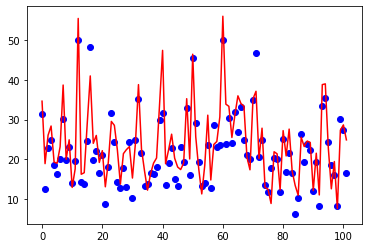

In [ ]:
import matplotlib.pyplot as plt
X_axis=range(len(YPred))
plt.scatter(X_axis,Ytest,color='blue',label='Original')
plt.plot(X_axis,YPred,color='red',label='Predicted')
plt.legend
plt.show